In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fma
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
# %matplotlib inline
pd.set_option('display.width', 600)
pd.set_option('display.max_columns', 14)
mpl.rcParams['axes.unicode_minus'] = False
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_rows', None)

In [3]:
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['font.size'] = 15

df=pd.read_csv('D:/Jupyter_Project_22/python_project_01/Final_for_quant/PCA/cleaned_integrated_b.csv',index_col=0)
df = df.dropna()

In [4]:
tickers=['BEL 20_2007-01-02-2022-01-25', 'CAC 40_2007-01-02-2022-01-25', 'DAX PERFORMANCE-INDEX_2007-01-02-2022-01-25', 'Dow Jones Industrial Average_2007-01-03-2022-01-25', 'ESTX 50 PR', 'Euronext 100 Index_2007-01-02-2022-01-25', 'FTSE 100_2007-01-02-2022-01-25', 'FTSE Bursa Malaysia KLCI_2007-01-03-2022-01-25', 'futures_BRENT_OIL', 'futures_COCOA', 'futures_Coffee', 'futures_COPPER', 'futures_CORN', 'futures_COTTON', 'futures_CRUDE_OIL', 'futures_DOW', 'futures_FEEDER_CATTLE', 'futures_GOLD', 'futures_LEAN_HOGS', 'futures_LIVE_CATTLE', 'futures_LUMBER', 'futures_NASDAQ',
       'futures_NATURAL_GAS', 'futures_OAT', 'futures_PALLADIUM', 'futures_PLATINUM', 'futures_ROUGH_RICE', 'futures_SILVER', 'futures_SOYBEAN', 'futures_SOYBEAN_MEAL', 'futures_SOYBEAN_OIL', 'futures_SPX', 'futures_SUGAR', 'futures_US10YT', 'futures_US2YT', 'futures_US30YT', 'futures_US5YT', 'futures_WHEAT', 'HANG SENG INDEX_2007-01-02-2022-01-25', 'IBOVESPA_2007-01-02-2022-01-25', 'IPC MEXICO_2007-01-02-2022-01-25', 'Jakarta Composite Index_2007-01-02-2022-01-25', 'KOSPI Composite Index_2007-01-02-2022-01-25', 'MERVAL_2007-01-02-2022-01-25', 'NASDAQ Composite_2007-01-03-2022-01-25',
       'Nikkei 225_2007-01-04-2022-01-25', 'NYSE AMEX COMPOSITE INDEX_2007-01-03-2022-01-25', 'NYSE COMPOSITE (DJ)_2007-01-03-2022-01-25', 'Russell 2000_2007-01-03-2022-01-25', 'Shenzhen Component_2007-01-04-2022-01-25', 'SSE Composite Index_2007-01-04-2022-01-25', 'STI Index_2007-01-03-2022-01-25', 'S_P 500_2007-01-03-2022-01-25', 'S_P BSE SENSEX_2007-01-02-2022-01-25', 'TSEC weighted index_2007-01-02-2022-01-25', 'Vix_2007-01-03-2022-01-25', 'AUDUSD=X_2007-01-01-2022-01-25', 'CNY=X_2007-01-01-2022-01-25', 'EURCAD=X_2007-01-01-2022-01-25', 'EURCHF=X_2007-01-01-2022-01-25',
       'EURGBP=X_2007-01-01-2022-01-25', 'EURHUF=X_2007-01-01-2022-01-25', 'EURJPY=X_2007-01-01-2022-01-25', 'EURSEK=X_2007-01-01-2022-01-25', 'EURUSD=X_2007-01-01-2022-01-25', 'GBPJPY=X_2007-01-01-2022-01-25', 'GBPUSD=X_2007-01-01-2022-01-25', 'HKD=X_2007-01-01-2022-01-25', 'IDR=X_2007-01-01-2022-01-25', 'INR=X_2007-01-01-2022-01-25', 'JPY=X_2007-01-01-2022-01-25', 'MXN=X_2007-01-01-2022-01-25', 'MYR=X_2007-01-01-2022-01-25', 'NZDUSD=X_2007-01-01-2022-01-25', 'PHP=X_2007-01-01-2022-01-25', 'RUB=X_2007-01-01-2022-01-25', 'SGD=X_2007-01-01-2022-01-25', 'THB=X_2007-01-01-2022-01-25',
       'ZAR=X_2007-01-01-2022-01-25']
#################################################################################################################
import statsmodels.tsa.stattools as ts


In [5]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [6]:
scores, pvalues, pairs = find_cointegrated_pairs(df)


<class 'list'>


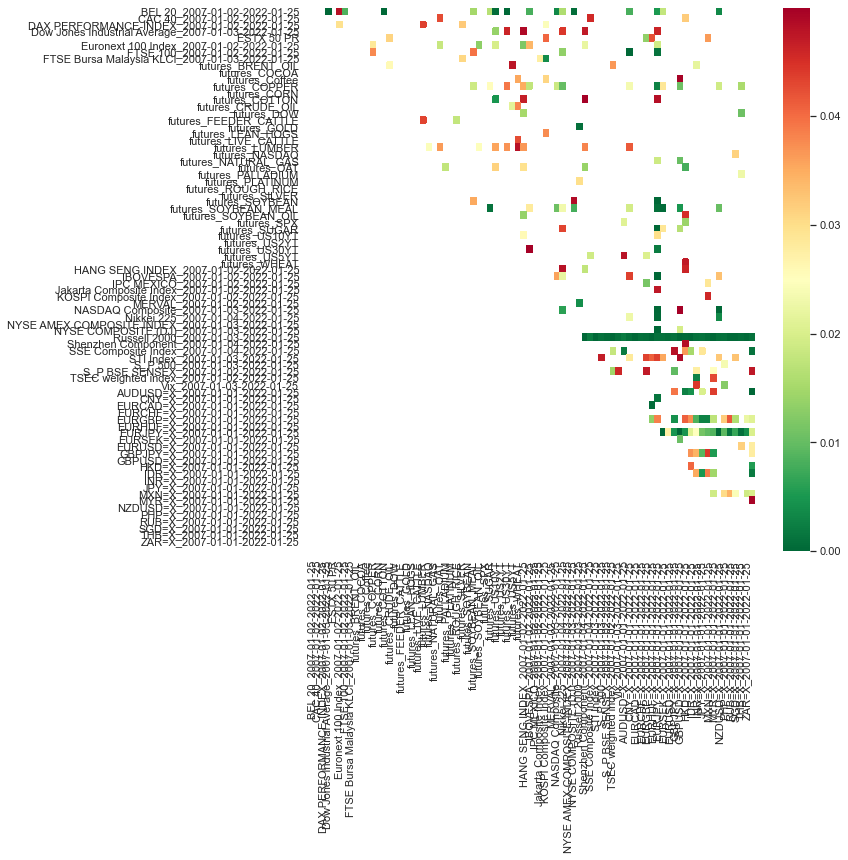

In [10]:
import seaborn
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(pvalues, xticklabels=tickers, yticklabels=tickers, cmap='RdYlGn_r'
                , mask = (pvalues >= 0.05)
                )
print(type(pairs))

In [13]:
# import pickle
# with open('pairs.pkl', 'wb') as f:
#     pickle.dump(pairs, f)
    
pairs=pd.read_pickle('pairs.pkl')
print(pairs)

[('ALL ORDINARIES_2007-01-02-2022-01-25', 'CAC 40_2007-01-02-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'DAX PERFORMANCE-INDEX_2007-01-02-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'Dow Jones Industrial Average_2007-01-03-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'Euronext 100 Index_2007-01-02-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'MERVAL_2007-01-02-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'NASDAQ Composite_2007-01-03-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'Nikkei 225_2007-01-04-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'NYSE COMPOSITE (DJ)_2007-01-03-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'Russell 2000_2007-01-03-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'S_P 500_2007-01-03-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'S_P BSE SENSEX_2007-01-02-2022-01-25'), ('ALL ORDINARIES_2007-01-02-2022-01-25', 'TSEC weighted index_2007-01-02-2022-01-25'), ('ALL O

In [38]:
from collections import Counter

counts = Counter(x[0] for x in pairs)
print(counts)


Counter({'Vix_2007-01-03-2022-01-25': 31, 'futures_LUMBER': 17, 'ALL ORDINARIES_2007-01-02-2022-01-25': 16, 'futures_LEAN_HOGS': 14, 'EURHUF=X_2007-01-01-2022-01-25': 13, 'MERVAL_2007-01-02-2022-01-25': 10, 'HANG SENG INDEX_2007-01-02-2022-01-25': 9, 'futures_COCOA': 9, 'DAX PERFORMANCE-INDEX_2007-01-02-2022-01-25': 8, 'futures_BRENT_OIL': 7, 'futures_COPPER': 7, 'CAC 40_2007-01-02-2022-01-25': 6, 'futures_CRUDE_OIL': 6, 'futures_OAT': 6, 'futures_SOYBEAN_MEAL': 6, 'CNY=X_2007-01-01-2022-01-25': 5, 'Dow Jones Industrial Average_2007-01-03-2022-01-25': 5, 'IDR=X_2007-01-01-2022-01-25': 5, 'Russell 2000_2007-01-03-2022-01-25': 5, 'futures_ROUGH_RICE': 5, 'BEL 20_2007-01-02-2022-01-25': 4, 'EURCAD=X_2007-01-01-2022-01-25': 4, 'Euronext 100 Index_2007-01-02-2022-01-25': 4, 'NASDAQ Composite_2007-01-03-2022-01-25': 4, 'S_P 500_2007-01-03-2022-01-25': 4, 'AUDUSD=X_2007-01-01-2022-01-25': 3, 'ESTX 50 PR': 3, 'EURGBP=X_2007-01-01-2022-01-25': 3, 'KOSPI Composite Index_2007-01-02-2022-01-25': 3

In [28]:

len(pairs)

275

In [48]:
S1 = df['futures_COPPER']
S2 = df['futures_SILVER']

score, pvalue, _ = coint(S1, S2)
print("%.4f" % pvalue)

0.0277


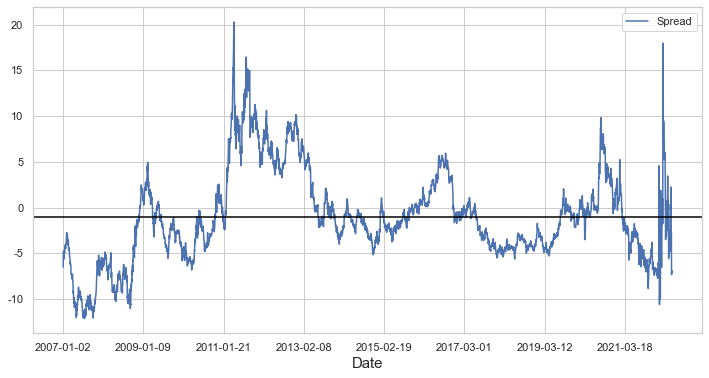

In [49]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['futures_COPPER']
b = results.params['futures_COPPER']

spread = S2 - b * S1
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
# plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Spread']);
##BLACK MEAN라인보다 위에 있으면 S2의 강세. MEAN라인 보다 밑에 있으면 S1의 강세

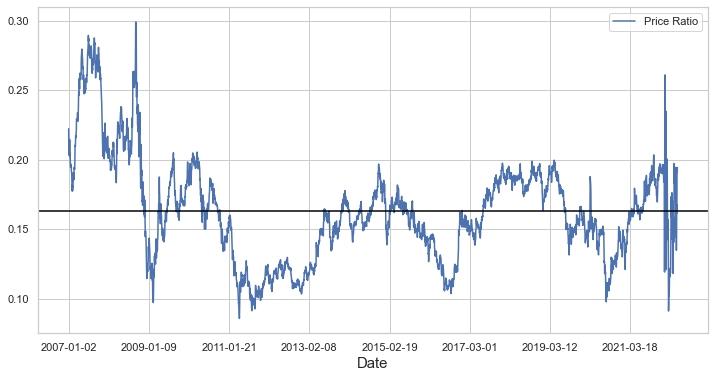

In [50]:
ratio = S1/S2
ratio.plot(figsize=(12,6))
plt.axhline(ratio.mean(), color='black')
# plt.xlim('2008-01-01', '2018-01-01')
plt.legend(['Price Ratio']);

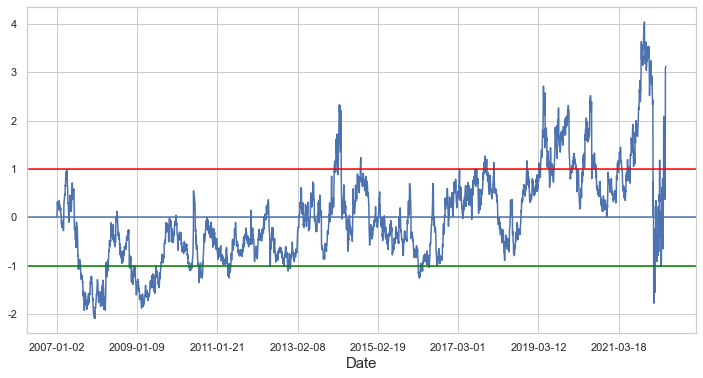

In [24]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio).plot(figsize=(12,6))
plt.axhline(zscore(ratio).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
# plt.xlim('2013-01-01', '2018-01-01')
plt.show()